In [1]:
# -*- coding: utf-8 -*-
import matplotlib.pyplot as plt
import numpy as np
import time as time
from numpy.linalg import inv
from lib.simubot import hom, loc,simubot
from lib.dibrobot import dibrobot
from lib.utils import c2m, polares, norm_pi

In [2]:
def escenario():
   # Escenario
    plt.vlines(0, 0, 3.2, colors='k',lw=1.5)
    plt.vlines(1.2, 0.8, 3.2, colors='k',lw=1.5)
    plt.vlines(2.8, 0, 3.2, colors='k',lw=1.5)
    plt.hlines(0, 0, 2.8, colors='k',lw=1.5)
    plt.hlines(3.2, 0, 0.4, colors='k',lw=1.5)
    plt.hlines(3.2, 0.8, 1.2, colors='k',lw=1.5)
    plt.hlines(3.2, 1.6, 2.4, colors='k',lw=1.5)
    plt.hlines(1.2, 1.6, 2.4, colors='k',lw=1.5)
    # Grid
    plt.hlines(0.4, 0, 2.8, colors='k',ls='--',lw=0.5)
    plt.hlines(0.8, 0, 2.8, colors='k',ls='--',lw=0.5)
    plt.hlines(1.2, 0, 2.8, colors='k',ls='--',lw=0.5)
    plt.hlines(1.6, 0, 2.8, colors='k',ls='--',lw=0.5)
    plt.hlines(2.0, 0, 2.8, colors='k',ls='--',lw=0.5)
    plt.hlines(2.4, 0, 2.8, colors='k',ls='--',lw=0.5)
    plt.hlines(2.8, 0, 2.8, colors='k',ls='--',lw=0.5)
    plt.hlines(3.2, 0, 2.8, colors='k',ls='--',lw=0.5)
    plt.vlines(0.4, 0, 3.2, colors='k',ls='--',lw=0.5)
    plt.vlines(0.8, 0, 3.2, colors='k',ls='--',lw=0.5)
    plt.vlines(1.2, 0, 3.2, colors='k',ls='--',lw=0.5)
    plt.vlines(1.6, 0, 3.2, colors='k',ls='--',lw=0.5)
    plt.vlines(2, 0, 3.2, colors='k',ls='--',lw=0.5)
    plt.vlines(2.4, 0, 3.2, colors='k',ls='--',lw=0.5)
    plt.vlines(2.8, 0, 3.2, colors='k',ls='--',lw=0.5)
    # Cuadros
    plt.vlines(0, 1.4, 1.8, colors='b',lw=4)
    plt.hlines(0, 0.4, 0.8, colors='b',lw=4)
    plt.hlines(3.2, 1.8, 2.2, colors='b',lw=4)

    plt.gca().set_aspect('equal', adjustable='box')


def dibrobotesc(loc):
    escenario()
    dibrobot(loc)


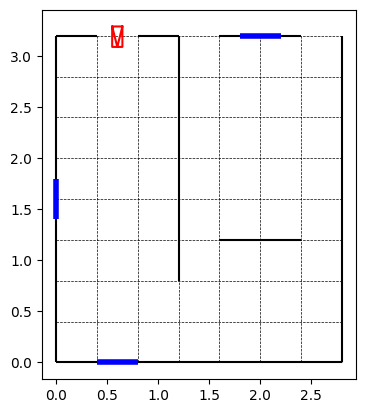

In [13]:
dibrobotesc([0.6, 3.2, -np.pi/2])

0.1875 0.6366197723675814 0.6366197723675814


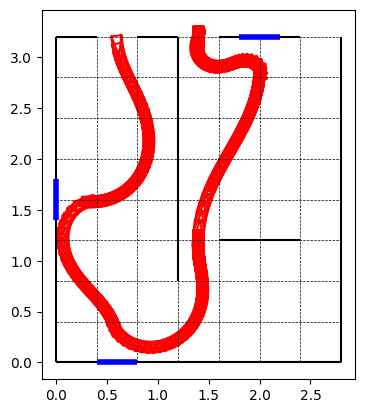

In [ ]:
v_hist = np.array([])
w_hist = np.array([])
def control_de_pose(pasos, distancia, angulo, wXrInicial=[0,0,0]):
    global v_hist, w_hist
    wXr = wXrInicial
    w_max = 2.0
    v_max = 1.5
    
    rho_max = 8.0
    alpha_max = np.pi
    beta_max = np.pi

    kp, ka, kb = v_max/rho_max, w_max/alpha_max, w_max/beta_max
    # kp, ka, kb = 0.2, 0.8, 0.4
    print(kp, ka, kb)
    assert kp > 0.0 and kb > 0.0 and ka - kp > 0.0
    
    T = 0.25
    K = [[kp,0,0],[0,ka,kb]]

    for paso in pasos:
        while True:
            wXg = [paso[1], paso[2], paso[3]]
            gXr = loc(np.dot(inv(hom(wXg)),hom(wXr)))


            gPr = polares(gXr[0], gXr[1], gXr[2])

            [v,w]= np.dot(K, gPr)
            # print("Velocidad angular: ", norm_pi(w))
            
            v_hist = np.append(v_hist, v)
            w_hist = np.append(w_hist, norm_pi(w))

            wXr2 = simubot([v,w], wXr, T)
            dibrobot(wXr2)

            distancia_p = 0.01 if paso[0] == 'p' else distancia
            if gPr[0] < distancia_p and np.abs(gPr[2]) < np.deg2rad(angulo):
                wXr = wXr2
                break

            wXr = wXr2

    escenario()

    
control_de_pose(pasos=[
        ['c',0, c2m(4), -np.pi],
        ['c',c2m(1.5), 0, -np.pi/2],
        ['p', c2m(3.5), c2m(3), np.pi/2],
        ['c',c2m(5), c2m(8), np.pi/2],
        ['p', c2m(3.5), c2m(8), np.pi/2]
    ],
    distancia=c2m(1),
    angulo=30,
    wXrInicial=[0.6, 3.2, -np.pi/2]
)

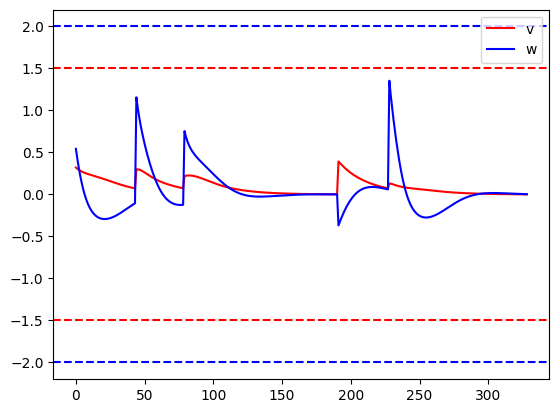

In [110]:
plt.plot(v_hist, label='v', color='r')
plt.plot(w_hist, label='w', color='b')

# draw a line on y = 2
plt.axhline(y=2, color='b', linestyle='--')
plt.axhline(y=-2, color='b', linestyle='--')
plt.axhline(y=1.5, color='r', linestyle='--')
plt.axhline(y=-1.5, color='r', linestyle='--')

plt.legend()
plt.show()